# **Hotel Booking Demands**
#### by: **Angel**

### **Contents**

1. Business Problem Understanding
2. Data Understanding & Cleaning
3. Data Analysis & Preparation
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem Understanding**

### **1.1 Context**

Dalam industri perhotelan, mengelola pembatalan dan ketidakdatangan sangat penting untuk menjaga profitabilitas dan efisiensi operasional. Para manajer hotel akan terkena dampak langsung dari jumlah pembatalan, yang memengaruhi ketersediaan kamar, staf, dan perkiraan pendapatan. 

Maka dari itu, dengan mengumpulkan data dari pemesanan sebelumnya, Hotel ingin mengetahui pesanan mana yang kiranya akan dibatalkan atau pun tidak dengan membuat model. Model akan diterapkan untuk memprediksi kemungkinan pembatalan pada saat konfirmasi pemesanan.

Dengan hasil model ini, **Manajer hotel** dapat memprediksi pembatalan terlebih dahulu, memungkinkan mereka untuk menetapkan ulang ruangan atau mengelola daftar tunggu dengan lebih efisien. Dan **Tim pemasaran** dapat menyesuaikan penawaran dan komunikasi untuk mengurangi pembatalan dari pelanggan berisiko tinggi dengan memahami faktor risiko pembatalan. **Tim Front Desk & Layanan Pelanggan** juga dapat menjangkau pelanggan secara lebih proaktif dengan menawarkan insentif untuk mencegah pembatalan, atau menyesuaikan ekspektasi pelanggan.

### **1.2 Problem Statement**

Pembatalan yang tidak diantisipasi dapat menyebabkan hilangnya pendapatan, terutama selama musim puncak atau ketika kamar dipesan digunakan sebagai cadangan bagi pelanggan dalam daftar tunggu. Dengan memprediksi pembatalan pemesanan sebelum terjadi, hotel dapat mengelola inventarisnya dengan lebih baik, mengoptimalkan strategi pemesanan, dan meningkatkan layanan pelanggan.

### **1.3 Goals**

**Tujuan utama** dari proyek ini adalah untuk membangun model pembelajaran mesin yang dapat memprediksi status pembatalan pemesanan berdasarkan data historis pemesan sebelumnya. Dengan klasifikasi biner, kita akan mendapatkan hasilnya (variabel target) yang berupa: 

- 1: Pemesanan dibatalkan
- 0: Pemesanan tidak dibatalkan

Selain itu, kita juga dapat **Identifikasi Prediktor Utama Pembatalan**, dengan wawasan yang kita dapatkan tentang fitur mana (misalnya, segmen pasar, jumlah perubahan pemesanan, jenis deposit) yang memiliki dampak paling signifikan terhadap kemungkinan pembatalan.

### **1.4 Analytic Approach**

Yang pertama, kita akan melakukan *Feature Selection* untuk memilih fitur-fitur yang berguna dan berpengaruh untuk diinput pada model (contoh : `previous_cancellations` dan `booking_changes` mungkin berkorelasi, jika kedua fitur ini sangat berkorelasi, kami mungkin mempertimbangkan untuk mempertahankan salah satunya saja), lalu kita juga akan melakukan *Feature Engineering* dengan mengunakan fitur-fitur yang disediakan untuk menciptakan wawasan tambahan jika diperlukan (contoh : Menggabungkan `previous_cancellations` dan `booking_changes` untuk membuat fitur "riwayat pembatalan" atau Mengkodekan variabel kategori menjadi numerikal seperti `market_segment`, `deposit_type`, dan `Reserved_room_type` untuk pembelajaran mesin)

Selanjutnya, kita akan masuk pada tahap *Model Selection* menguji model dengan melatih dan mengevaluasi model-model klasifikasi seperti Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree Classifier, Random Forest Classifier, XGBoost Classifier, LightGBM Classifier dan Gradient Boosting Classifier. Lalu kita akan membandingkan performa model dengan metriks Akurasi, Presisi, Skor F1 dan AUC.

Dari hasil ini, kita dapat menentukan model mana yang performanya paling bagus dan kita akan lanjut pada tahap *Hyperparameter Tuning*, pada tahap ini, kita akan mencari value untuk hyperparameter. Lalu kita akan mengevaluasi performa model sebelum dan sesudah tuning.

### **1.5 Metric Evaluation**

Metrik evaluasi harus dipilih berdasarkan masalah bisnis dan bagaimana pemangku kepentingan akan menggunakan model tersebut. Karena model ini akan membantu dalam memprediksi pembatalan, metrik berikut akan sangat relevan:
- Accuracy and Precision: Memastikan bahwa model tidak memprediksi pembatalan secara berlebihan, meminimalkan jumlah prediksi pembatalan yang salah, yang dapat menyebabkan hilangnya pendapatan jika tindakan diambil terlebih dahulu.
- Skor F1: Metrik yang seimbang antara presisi dan perolehan, yang mencerminkan efektivitas model secara keseluruhan dalam memprediksi pembatalan.
- Important Features: Mengetahui fitur mana yang paling berpengaruh pada pembatalan untuk mengoptimalkan stategi pemesanan dan meningkatkan layanan pelanggan agar lebih tepat sasaran.

## **2. Data Understanding & Cleaning**

### **2.1 Data Understanding**
**Data Source** : [Hotel Booking Demand](https://drive.google.com/drive/folders/17KIeOXK7eYGuzgpn_IljlUFcE4v96lSL?usp=sharing)

- Dataset merupakan informasi booking sebuah hotel di Portugal.
- Setiap baris data merepresentasikan informasi customer terkait room reservation.
- Semua data personal yang dapat mengindentifikasi customer telah dihilangkan.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| country | Object | Country of origin |
| market_segment | Object | Market segment designation |
| previous_cancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking |
| booking_changes | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type | Object | Indication on if the customer made a deposit to guarantee the booking |
| days_in_waiting_list | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type | Object | Type of booking |
| reserved_room_type | Object | Code of room type reserved (Code is presented instead of designation for anonymity reasons)|
| required_car_parking_space | Integer | Number of car parking spaces required by the customer |
| total_of_special_request | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) |
| is_canceled | Integer | Value indicating if the booking was canceled (1) or not (0) |



In [97]:
# Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

# Encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import shap

# Ignore Warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Load Dataset
df = pd.read_csv("data_hotel_booking_demand.csv")
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [3]:
# Information of each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [4]:
# Missing Value and Unique Value of each Column
listItem = []
for col in df.columns :
    listItem.append([col, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,null,nullPct,unique,uniqueSample
0,country,351,0.42,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,0,0.00,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,0,0.00,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,0,0.00,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,0,0.00,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,0,0.00,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,0,0.00,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,0,0.00,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,0,0.00,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,0,0.00,6,"[0, 2, 1, 3, 4, 5]"


In [5]:
# Check unique value count of each categorical column
df.groupby(['country']).size().to_frame('count').reset_index()

,country,count
0,ABW,2
1,AGO,243
2,AIA,1
3,ALB,6
4,AND,6
...,...,...
157,VGB,1
158,VNM,5
159,ZAF,60
160,ZMB,1


In [6]:
df.groupby(['market_segment']).size().to_frame('count').reset_index()

,market_segment,count
0,Aviation,165
1,Complementary,511
2,Corporate,3792
3,Direct,8898
4,Groups,13721
5,Offline TA/TO,17025
6,Online TA,39460
7,Undefined,1


In [7]:
df.groupby(['deposit_type']).size().to_frame('count').reset_index()

,deposit_type,count
0,No Deposit,73352
1,Non Refund,10111
2,Refundable,110


In [8]:
df.groupby(['customer_type']).size().to_frame('count').reset_index()

,customer_type,count
0,Contract,2882
1,Group,423
2,Transient,62732
3,Transient-Party,17536


In [9]:
df.groupby(['reserved_room_type']).size().to_frame('count').reset_index()

,reserved_room_type,count
0,A,60041
1,B,787
2,C,673
3,D,13526
4,E,4649
5,F,2037
6,G,1447
7,H,401
8,L,3
9,P,9


In [10]:
# Check Duplicates Value
df.duplicated().sum()  

np.int64(73371)

Dari Dataset yang ada, kita bisa melihat bahwa:
* Dataset **Hotel Booking Demand** memiliki 11 kolom dan 83573 baris.
* Kolom `country` memiliki 351 data kosong.
* Terdapat beberapa unique value pada sebuah kolom yang kurang relevant.
* Terdapat 73371 data duplikat.

### **2.2 Data Cleaning**

Setelah mengetahui anomali-anomali apa saja yang terdapat di dalam dataset, kita akan masuk dalam tahapan *data cleaning*. 
Setiap penangan anomali yang ditangani, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik. 
Beberapa hal yang perlu dilakukan adalah:
- Melakukan treatment terhadap missing value dalam `country`.
- Melakukan treatment terhadap duplikat value.
- Melakukan treatment pada unique value yang kurang relevant.

In [11]:
# Fill missing value in country
mode_country = df['country'].mode()[0]
df['country'].fillna(mode_country, inplace=True)

Nilai yang hilang (`country`) relatif acak dan tidak ada pola jelas yang menghubungkan entri `country` ke kolom lain, mengisi missing value `country` dengan `country` yang paling sering digunakan (mode) adalah pendekatan yang masuk akal. Terdapat beberapa alasan yang dapat mendukung keputisan ini yaitu :
- Jumlah data kosong pada `country` hanya kurang dari 1 % (0,42).
- Negara yang paling umum kemungkinan akan mewakili sebagian besar tamu Anda, dan mengisi entri yang hilang dengan negara ini akan memastikan bahwa Anda tidak menimbulkan terlalu banyak bias.
- Nilai yang hilang tersebar di booking entri yang berbeda, penggunaan mode ini adalah cara yang netral dan tidak mengganggu dalam mengisi data.

In [12]:
# Remove Duplicate
df.drop_duplicates(inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10097 entries, 0 to 10096
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      10097 non-null  object
 1   market_segment               10097 non-null  object
 2   previous_cancellations       10097 non-null  int64 
 3   booking_changes              10097 non-null  int64 
 4   deposit_type                 10097 non-null  object
 5   days_in_waiting_list         10097 non-null  int64 
 6   customer_type                10097 non-null  object
 7   reserved_room_type           10097 non-null  object
 8   required_car_parking_spaces  10097 non-null  int64 
 9   total_of_special_requests    10097 non-null  int64 
 10  is_canceled                  10097 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 867.8+ KB


Terdapat lebih dari 70ribu data duplikat pada dataset ini, meskipun ini menupakan jumlah yang sangat besar, hampir 90% dari data yang ada, kita tetap menghapus atau menghilang kan duplicate value ini karena beberapa alasan, yaitu:
- Baris ini adalah baris dalam kumpulan data yang setiap fiturnya identik. Menghapusnya sering kali merupakan ide bagus karena tidak memberikan informasi tambahan untuk dipelajari model.
- Duplikat mewakili representasi kelas tertentu yang berlebihan (banyak salinan dari data yang sama), menghapus duplikat tersebut dapat meningkatkan model Anda dengan mencegahnya agar tidak terlalu cocok dengan data yang terlalu terwakili tersebut (overfitting).
- Mengurangi duplikat dapat mempercepat pelatihan model karena algoritme akan memiliki lebih sedikit data untuk diproses.
- Meskipun kumpulan data menjadi lebih kecil setelah menghapus duplikat, kita dapat mempertimbangkan untuk menambahnya dengan membuat sampel sintetis baru (menggunakan teknik seperti SMOTE atau lainnya).

In [13]:
# Check unrelevant unique value
df.loc[df['market_segment'] == 'Undefined']

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
9235,PRT,Undefined,0,0,No Deposit,0,Transient-Party,B,0,1,1


In [14]:
df.loc[df['reserved_room_type'].isin(['L', 'P'])]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
1518,PRT,Direct,0,0,No Deposit,0,Transient,L,0,0,0
2738,PRT,Complementary,0,0,No Deposit,0,Transient,P,0,0,1
4556,PRT,Online TA,0,0,No Deposit,0,Transient,P,0,0,1
5327,PRT,Offline TA/TO,0,0,No Deposit,0,Group,P,0,0,1
7736,PRT,Corporate,0,0,No Deposit,0,Transient,P,0,0,1
8857,PRT,Direct,0,0,No Deposit,0,Transient,L,0,0,1


In [15]:
# Drop unrelevant unique value
x = df.loc[df['market_segment'] == 'Undefined'].index
df = df.drop(x)
y = df.loc[df['reserved_room_type'].isin(['L', 'P'])].index
df = df.drop(y)

Terdapat 1 (Undefined) unique value pada kolom `market_segment` dan 2 (L, P) unique value pada kolom `reserved_room_type`. Kita akan menghapus atau menghilangkan baris nya karena beberapa alasan, yaitu:
* Jumlah baris yang memiliki kondisi ini hanya berjumlah 7 baris dan tidak akan membawa pengaruh signifikan pada model.
* Data numerical pada baris yang tersebut majority memiliki value nol.
* Baris tersebut majority membatalkan pesanan.
* Semua baris data tersebut memiliki nilai `country` yang sama yaitu Portugal, dimana merupakan nilai mode pada kolom tersebut.

Dari tahap ini, terdapat beberapa perubahan pada data kita, yaitu:
* Dataset **Hotel Booking Demand** yang memiliki 11 kolom dan 83573 baris menjadi 11 kolom dan 10090 baris.
* Kolom `country` sudah tidak memiliki data kosong.
* Tidak ada data duplikat.

## **3. Data Analysis & Preparation**

### **3.1 Data Analysis**

Sebelum memasuki tahapan *data preparation*, kita akan melakukan beberapa analysis pada fitur-fitur yang ada. Beberapa analysis yang diperlukan adalah:
- Menganalisa ada atau tidaknya Outliers pada data.
- Menganalisa correlasi pada fitur-fitur numeric untuk mengetahui hubungan antara fitur.
- Menganalisa status pembatalan berdasarkan fitur-fitur categorical.

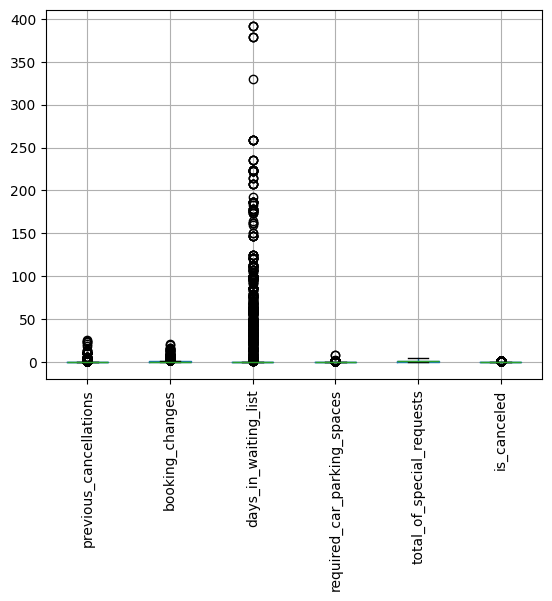

In [16]:
# Check data Outliers
df.boxplot(rot=90);

In [17]:
# Funtion to check Outliers
def Outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [18]:
# Total Outliers
numcol = {'Feature' : ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests'],
          'Jlh_Outliers' : []}
for i in numcol['Feature']:
    numcol['Jlh_Outliers'].append(len(Outliers(i)))
df_Outliers_Sum = pd.DataFrame(numcol)
df_Outliers_Sum

,Feature,Jlh_Outliers
0,previous_cancellations,383
1,booking_changes,823
2,days_in_waiting_list,465
3,required_car_parking_spaces,1630
4,total_of_special_requests,0


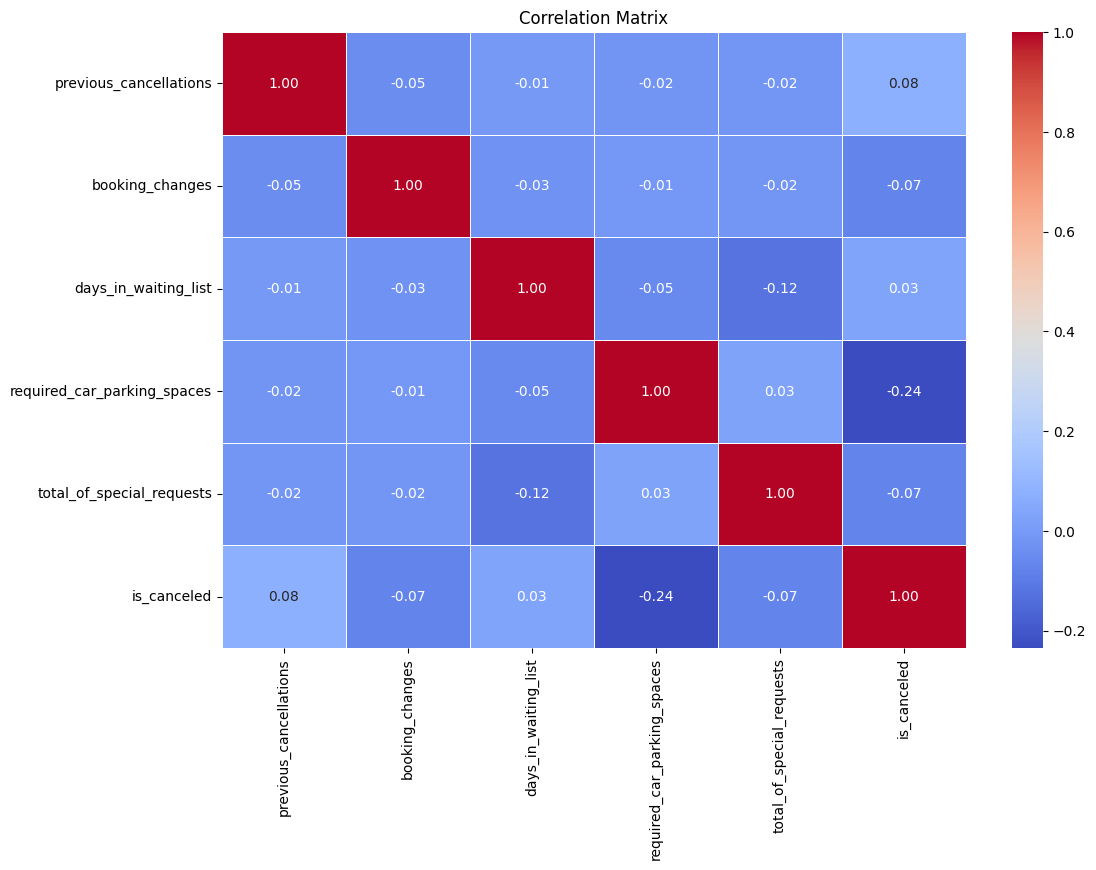

In [19]:
# Correlation between numerical features
corr_matrix = df[['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled']].corr()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Funtion for Hierarchical - Stacked Bar Chart of each categorical features 
def Stacked_Bar_Chart(col):
    tmp_df = df.groupby([col, 'is_canceled']).size().to_frame('count').reset_index()

    tmp = tmp_df.set_index([col, 'is_canceled']).unstack()
    tmp.columns = tmp.columns.levels[1]

    tmp.plot(kind='bar', stacked=True);
    plt.title(f'Status pembatalan berdasarkan {col}', weight='bold').set_fontsize('16')
    return plt.show()

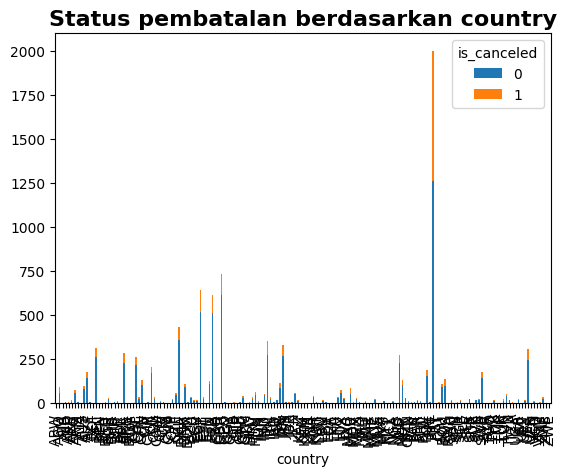

In [21]:
# Status pembatalan berdasarkan kolom `country`
Stacked_Bar_Chart('country')

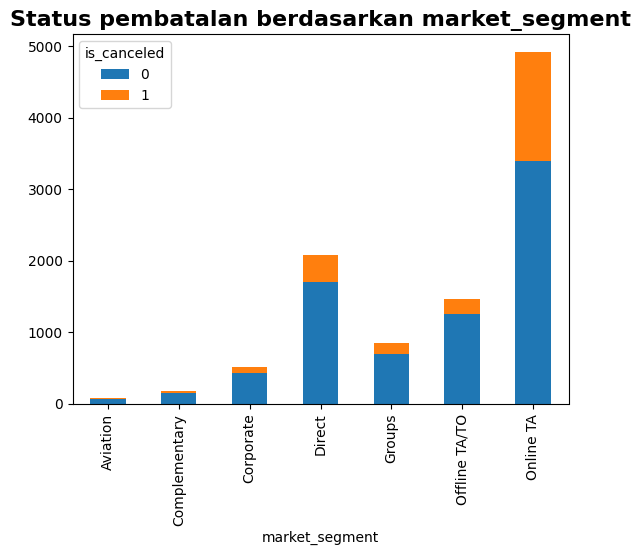

In [22]:
# Status pembatalan berdasarkan kolom `market_segment`
Stacked_Bar_Chart('market_segment')

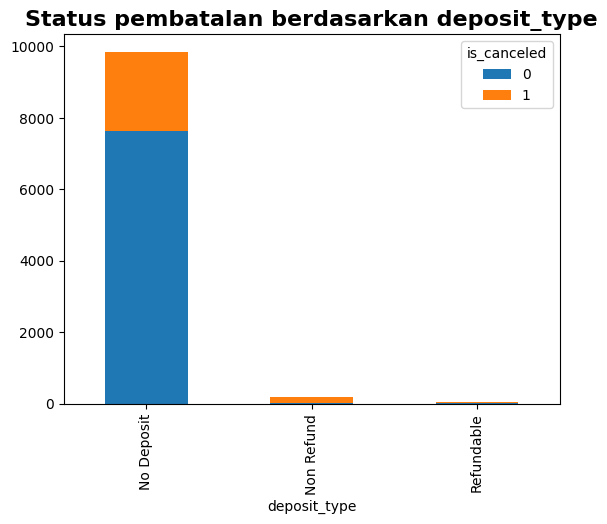

In [23]:
# Status pembatalan berdasarkan kolom `deposit_type`
Stacked_Bar_Chart('deposit_type')

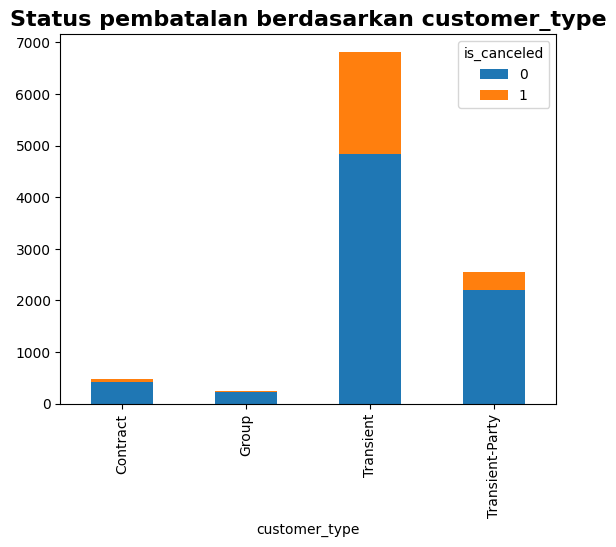

In [24]:
# Status pembatalan berdasarkan kolom `customer_type`
Stacked_Bar_Chart('customer_type')

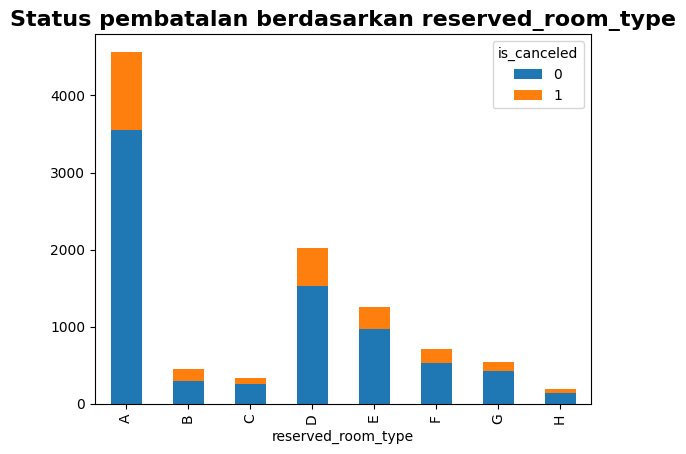

In [25]:
# Status pembatalan berdasarkan kolom `reserved_room_type`
Stacked_Bar_Chart('reserved_room_type')

Dari hasil analisa di atas, kita dapat mengetahui bahwa:

- Terdapat banyak outliers pada kolom numerical, terutama kolom `required_car_parking_spaces` yang memiliki jumlah outliers sebesar 1630 baris. Lalu diikuti oleh kolom `booking_changes` (823 baris), `days_in_waiting_list` (465 baris) dan `previous_cancellations` (383 baris).
- Dengan Heatmap yang menunjukkan korelasi antara berbagai kolom numerical di atas, kita dapat menyimpulkan bahwa hampir tidak ada atau sangat rendah hubungan suatu kolom dengan kolom lainnya.
- Dengan bar chart di atas kita bisa melihat distribusi setiap kolom kategorikal berserta status pembatalan nya.

### **3.2 Data Preparation**
Setelah menganalisa fitur-fitur yang ada pada dataset ini, kita akan masuk kedalam tahap *data preparation*. Pada tahap ini, ada beberapa hal yang akan kita lakukan, yaitu :
- Melakukan treatement pada Outliers.
- Melakukan Feature Selection.
- Melakukan Feature Engineering.
- Melakukan Data Splitting. 

In [26]:
# Check numerical columns statistic
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000
mean,0.089495,0.799108,3.599802,0.165312,0.942716,0.237760
std,0.832497,1.297611,22.316313,0.392498,1.039172,0.425733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [27]:
# Check outliers in previous_cancellations
Outliers('previous_cancellations').sort_values('previous_cancellations', ascending=False)

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
1729,PRT,Offline TA/TO,26,0,Non Refund,0,Transient,A,0,0,1
359,PRT,Groups,25,0,Non Refund,0,Transient,A,0,0,1
835,PRT,Groups,24,0,Non Refund,0,Transient,A,0,0,1
1384,IRL,Groups,24,0,No Deposit,0,Transient-Party,A,0,0,1
8908,PRT,Groups,21,0,No Deposit,0,Transient-Party,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
390,PRT,Online TA,1,0,No Deposit,0,Transient,G,0,0,1
368,PRT,Direct,1,0,No Deposit,0,Transient,B,0,0,1
364,PRT,Online TA,1,0,No Deposit,0,Transient,A,0,0,1
332,PRT,Groups,1,0,No Deposit,0,Transient-Party,A,0,0,1


In [28]:
# Check outliers in booking_changes
Outliers('booking_changes').sort_values('booking_changes', ascending=False)

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
5830,PRT,Corporate,0,21,No Deposit,0,Transient-Party,A,0,0,0
8624,PRT,Online TA,0,20,No Deposit,0,Transient,E,0,0,0
9365,ESP,Online TA,0,17,No Deposit,0,Transient,A,0,1,0
3370,AUT,Online TA,0,17,No Deposit,0,Transient,A,0,1,0
7796,IRL,Online TA,0,16,No Deposit,0,Transient,A,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
657,PRT,Direct,0,3,No Deposit,0,Transient,C,0,1,0
619,AUT,Groups,0,3,No Deposit,0,Transient-Party,E,0,0,0
476,ESP,Direct,0,3,No Deposit,0,Transient,D,0,0,0
375,DEU,Online TA,0,3,No Deposit,0,Transient,D,0,1,0


In [29]:
# Check outliers in days_in_waiting_list
Outliers('days_in_waiting_list').sort_values('days_in_waiting_list', ascending=False)

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
2104,PRT,Groups,0,0,Non Refund,391,Transient,A,0,0,1
8372,PRT,Groups,0,2,Non Refund,391,Transient,A,0,0,1
9853,PRT,Groups,0,1,Non Refund,391,Transient,A,0,0,1
3112,PRT,Groups,0,0,No Deposit,379,Transient-Party,A,0,0,1
4579,FRA,Groups,0,0,No Deposit,379,Transient-Party,A,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7183,PRT,Offline TA/TO,0,0,No Deposit,1,Transient,E,0,1,1
5516,FRA,Offline TA/TO,0,0,No Deposit,1,Transient,A,0,0,0
5020,PRT,Direct,0,1,No Deposit,1,Transient,E,0,1,1
2117,PRT,Offline TA/TO,0,1,No Deposit,1,Transient,E,1,0,0


In [30]:
# Check outliers in required_car_parking_spaces
Outliers('required_car_parking_spaces').sort_values('required_car_parking_spaces', ascending=False)

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
6316,AUT,Direct,0,1,No Deposit,0,Transient-Party,E,8,1,0
4696,AUT,Direct,0,1,No Deposit,122,Transient-Party,E,8,0,0
5337,ESP,Online TA,0,0,No Deposit,0,Transient-Party,A,3,2,0
9937,PRT,Offline TA/TO,0,0,No Deposit,0,Transient,A,2,1,0
9870,PRT,Direct,0,0,No Deposit,0,Transient,E,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,BRA,Direct,0,1,No Deposit,0,Transient,F,1,0,0
10000,BEL,Direct,0,3,No Deposit,0,Transient,D,1,0,0
10005,SWE,Direct,0,2,No Deposit,0,Transient,E,1,2,0
10007,FRA,Direct,0,0,No Deposit,0,Transient-Party,E,1,0,0


Setelah dilakukan pengecekan lebih dalam, kita dapat mengetahui bahwa hampir pada setiap kolom, value di atas 0 (nol) langsung dianggap outlier. Kita tidak akan melakukan treatment pada outliers-outliers tersebut, karena jika kita menghilangkan nya, maka kita akan kehilangan actual value dari semua kolom yang kita treatement.

Kita tidak akan melakukan *Feature Selection* karena dari hasil analisis korelasi (Heatmap) di atas, kita dapat mengetahui bahwa semua kolom pada data ini tidak memiliki hubungan satu sama lainnya, dengan melakukan seleksi (menghilangkan suatu kolom tertentu) dapat mengurangi insight yang akan kita dapat dan akurasi model.

In [31]:
# Encoding required_car_parking_spaces (yes = 1, no = 0)
df.loc[df['required_car_parking_spaces'] >=1, 'required_car_parking_spaces'] = 1
df.groupby(['required_car_parking_spaces', 'is_canceled']).size().to_frame('count').reset_index()

,required_car_parking_spaces,is_canceled,count
0,0,0,6061
1,0,1,2399
2,1,0,1630


In [32]:
# Encoding days_in_waiting_list (no waiting = 0, one week = 1, one month = 2, three month = 3, more than three month = 4 )
bins = [-1, 0, 7, 30, 90, float('inf')]
labels = [0, 1, 2, 3, 4]
df['days_in_waiting_list'] = pd.cut(df['days_in_waiting_list'], bins=bins, labels=labels, right=True)
df.groupby(['days_in_waiting_list', 'is_canceled']).size().to_frame('count').reset_index()

,days_in_waiting_list,is_canceled,count
0,0,0,7388
1,0,1,2237
2,1,0,26
3,1,1,8
4,2,0,44
5,2,1,35
6,3,0,133
7,3,1,76
8,4,0,100
9,4,1,43


In [33]:
# Encoding booking_changes (no changes = 0, one changes = 1, two changes = 2, three changes = 3, four changes = 4, more than four changes = 5 )
bins = [-1, 0, 1, 2, 3, 4, float('inf')]
labels = [0, 1, 2, 3, 4, 5]
df['booking_changes'] = pd.cut(df['booking_changes'], bins=bins, labels=labels, right=True)
df.groupby(['booking_changes', 'is_canceled']).size().to_frame('count').reset_index()

,booking_changes,is_canceled,count
0,0,0,4088
1,0,1,1570
2,1,0,2015
3,1,1,437
4,2,0,911
5,2,1,246
6,3,0,375
7,3,1,76
8,4,0,166
9,4,1,38


In [34]:
# Encoding previous_cancellations (no prior cancel = 0, one prior cancel = 1, two prior cancel = 2, three to ten prior cancel = 3, more than ten prior cancel = 4)
bins = [-1, 0, 1, 2, 10, float('inf')]
labels = [0, 1, 2, 3, 4]
df['previous_cancellations'] = pd.cut(df['previous_cancellations'], bins=bins, labels=labels, right=True)
df.groupby(['previous_cancellations', 'is_canceled']).size().to_frame('count').reset_index()

,previous_cancellations,is_canceled,count
0,0,0,7548
1,0,1,2159
2,1,0,70
3,1,1,191
4,2,0,29
5,2,1,23
6,3,0,29
7,3,1,15
8,4,0,15
9,4,1,11


In [35]:
# Create Dataframe copy to encode
df1 = df.copy()

In [36]:
# Encoding Categorical columns
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']),
    ('binary', ce.BinaryEncoder(), ['country'])
], remainder='passthrough')

Seperti yang telah dijelaskan sebelum nya, kita tidak melakukan treatement pada outliers kolom numerikal, namun kita melakukan grouping pada value dalam kolom masing-masing sesuai dengan domain knowledge pada industri perhotelan. Terdapat 4 kolom yang telah di prosses (*Feature Engineering*), yaitu:
- Kolom `previous_cancellations` telah dikelompokkan berdasarkan historis cancel seorang klien. 
    - Tidak pernah cancel = 0
    - 1 kali cancel = 1
    - 2 kali cancel = 2
    - 3 - 10 kali cancel = 3
    - Cancel di atas 10 kali = 4
- Kolom `booking_changes` telah dikelompokan berdasarkan historis permintaan perubahan booking klien.
    - Tidak pernah berubah = 0
    - 1 kali berubah = 1
    - 2 kali berubah = 2
    - 3 kali berubah = 3
    - 4 kali berubah = 4
    - Berubah di atas 4 kali = 5
- Kolom `days_in_waiting_list` juga telah dikelopokkan berdasarkan jumlah hari.
    - Tidak masuk waiting list = 0
    - 1 minggu dalam waiting list = 1
    - 1 bulan dalam waiting list = 2
    - 3 bulan dalam waiting list = 3
    - Lebih dari 3 bulan dalam waiting list = 4
- Kolom `required_car_parking_spaces` dibagi menjadi 2 kelompok saja, yaitu :
    - Yang tidak memerlukan tempat parkir = 0
    - Yang memerlukan tempat parkir = 1
\n

Kolom kategorikal juga telah melalui process encoding. Kolom `country` menggunakan *BinaryEncoder*, sedangkan kolom `market_segment`, `deposit_type`, `customer_type`, `reserved_room_type` mengunakan *OneHotEncoder*

In [37]:
# Split Independent variable and Dependent variable (Target)
X = df1.drop(columns=['is_canceled'])
y = df1['is_canceled']

In [38]:
# Apply the transformation
X_transformed = transformer.fit_transform(X)

transformed_columns = (list(transformer.transformers_[0][1].get_feature_names_out(['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type'])) +
                       list(transformer.transformers_[1][1].get_feature_names_out(['country'])) +
                       list(['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']))

X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_columns)
X_transformed_df

,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,...,country_3,country_4,country_5,country_6,country_7,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0
10086,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
10087,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10088,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Split Train and Test Data
x_train,x_test,y_train,y_test=train_test_split(X_transformed_df,y,stratify=y,test_size=0.3,random_state=1234)

Variable Dependent dan Independent telah di pisah kan menjadi x dan y. Data selanjutnya dipisahkan menjadi data training dan data untuk test dengan perbandingan 70:30.

## **4. Modeling**

### **4.1 Model Selection**

Pada awal tahap modeling ini, kita akan menguji model mana yang akan kita gunakan. Menguji model yang berbeda merupakan langkah penting dalam Machine Learning, karena dapat membantu kita mengidentifikasi algoritme mana yang berkinerja terbaik untuk kumpulan data Anda. Beberapa model yang dipertimbangkan untuk case ini adalah:


**Models**

| **Models** | **Type** | **Description** |
| --- | --- | --- |
| Logistic Regression | Linear model | Model klasifikasi yang memodelkan probabilitas suatu kelas dengan fungsi sigmoid. Digunakan untuk klasifikasi biner, meskipun bisa diperluas untuk multikelas. |
| K-Nearest Neighbors (KNN) | Instance-based learning algorithm (Non-parametric) | Algoritma yang mengklasifikasikan data berdasarkan mayoritas kelas dari tetangga terdekatnya dalam ruang fitur. |
| Decision Tree Classifier | Supervised learning (Non-linear) | Algoritma yang membangun model pohon keputusan dengan membagi data berdasarkan fitur untuk memaksimalkan pemisahan antar kelas pada setiap cabang. |
| Random Forest Classifier | Ensemble method (Bagging) | Ensemble dari banyak decision tree yang bekerja dengan cara melakukan voting untuk menentukan kelas akhir. Mengurangi overfitting dibandingkan decision tree tunggal. |
| XGBoost Classifier | Ensemble method (Boosting) | Algoritma boosting yang mengoptimalkan pembelajaran model dengan menggabungkan weak learners secara bertahap. Dikenal karena kecepatan dan akurasi tinggi. |
| LightGBM Classifier | Ensemble method (Boosting) | Seperti XGBoost, namun lebih efisien dalam memori dan waktu. Menggunakan teknik pembelajaran berbasis gradient boosting dengan optimisasi khusus untuk data besar. |
| Gradient Boosting Classifier | Ensemble method (Boosting) | Model boosting yang membangun pohon keputusan secara berurutan, di mana setiap pohon memperbaiki kesalahan dari pohon sebelumnya. |


Selanjutnya kita akan melatih dan mengevaluasi model-model yang disebut diatas, lalu membandingkan performanya menggunakan akurasi sebagai metrik evaluasi. Beberapa metrik yang kita gunakan adalah:
- Akurasi: Persentase keseluruhan prediksi yang benar.
- Presisi: Presisi akan membantu mengidentifikasi sebagian kecil pemesanan yang dibatalkan yang diprediksi dengan benar.
- Skor F1: Nilai rata-rata yang harmonis antara presisi dan perolehan, menyeimbangkan trade-off di antara keduanya.
- AUC: Area di Bawah Kurva ROC (AUC) akan membantu menilai kemampuan model dalam membedakan antara pemesanan yang dibatalkan dan yang tidak dibatalkan.


In [40]:
# Models option
models =   {'logreg' : LogisticRegression(),
            'knn' : KNeighborsClassifier(),
            'dt' : DecisionTreeClassifier(),
            'rf' : RandomForestClassifier(), 
            'xgb' : XGBClassifier(),
            'lgbm' : lgb.LGBMClassifier(),
            'gbc': GradientBoostingClassifier()}

In [41]:
# Models Selection
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    y_prob = model.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1-Score': f1,
        'AUC': auc})
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

results_df = pd.DataFrame(results)
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1679, number of negative: 5384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 7063, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237718 -> initscore=-1.165233
[LightGBM] [Info] Start training from score -1.165233


,Model,Accuracy,Precision,F1-Score,AUC
0,logreg,0.780311,0.752077,0.749170,0.815926
1,knn,0.743641,0.722488,0.730323,0.718583
2,dt,0.684836,0.674720,0.679489,0.556922
3,rf,0.703337,0.687740,0.694702,0.705927
4,xgb,0.778328,0.756144,0.760649,0.828875
5,lgbm,0.791543,0.769119,0.766375,0.833381
6,gbc,0.798480,0.780865,0.765155,0.845270


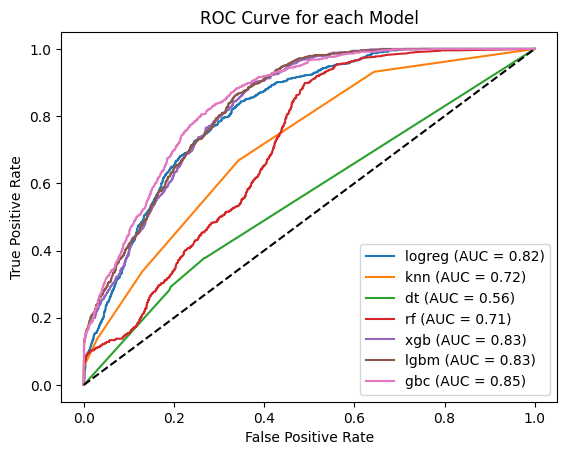

In [42]:
# Plot all ROC curves
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Model')
plt.legend(loc='lower right')
plt.show()

Dari hasil seleksi model diatas, kita mengetahui performa setiap model adalah:

| **Model** | **Accuracy** | **Precision** | **F1-Score** | **AUC** |	
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.780311 | 0.752077 | 0.749170 | 0.815926 |
| K-Nearest Neighbour Classifier | 0.743641 | 0.722488 | 0.730323 | 0.718583 |
| Decision Tree Classifier | 0.685167 | 0.675219 | 0.679912 | 0.555421 |
| Random Forest Classifier | 0.704988 | 0.688467 | 0.695773 | 0.707345 |
| XGBoost Classifier | 0.778328 | 0.756144 | 0.760649 | 0.828875 |
| LightGBM Classifier | 0.791543 | 0.769119 | 0.766375 | 0.833381 |
| Gradient Boosting Classifier | 0.798480 | 0.780865 | 0.765155 | 0.845270 |

Kita dapat menyimpulkan bahwa model dengan performa tertinggi adalah adalah **Gradient Boosting Classifier** karena memiliki nilai tertinggi pada kolom `Accuracy`, `F1-Score`, `AUC` dan nilai tertinggi kedua pada kolom `Precision` hanya dengan selisih nilai 0,1% lebih rendah dari pada **LightGBM Classifier**.
<br>
Pada kasus ini, **Gradient Boosting Classifier** memiliki nilai akurasi setinggi 79,8%, nilai presisi 78%, nilai F1 sebesar 76,5% dan nilai AUC nya adalah 84,5%. 
<br>
Maka dari itu, kita akan menggunakan model **Gradient Boosting Classifier** untuk tahap selanjutnya.

### **4.2 Hyperparameter Tuning**

Pada tahap Sebelumnya, kita mengetahui bahwa model dengan performa palng bagus adalah **Gradient Boosting Classifier**. Pada tahap ini, kita akan melakukan *Hyperparameter Tuning* pada model tersebut. Berikut adalah Hyperparameter yang akan kita tuning (setel):

| **Hyperparameter** | **Description** |
| --- | --- |
| n_estimators | Jumlah pohon yang sedang dalam proses boosting. Lebih banyak pohon dapat menghasilkan kinerja yang lebih baik, namun terlalu banyak pohon dapat menyebabkan overfitting. |
| learning_rate | Mengontrol seberapa besar kontribusi setiap pohon pada model akhir. Kecepatan pemelajaran yang lebih kecil memerlukan lebih banyak pohon. |
| max_depth | Kedalaman maksimum masing-masing pohon. Pepohonan yang lebih dalam dapat memodelkan hubungan yang lebih kompleks namun mungkin juga terlalu cocok. |
| min_samples_split | Jumlah minimum sampel yang diperlukan untuk memisahkan node internal. Nilai yang lebih tinggi mengurangi overfitting dengan menjadikan pohon lebih "konservatif". |
| min_samples_leaf | Jumlah minimum sampel yang diperlukan untuk berada dalam node daun. Ini juga membantu dalam regularisasi. |
| subsample | Bagian dari data pelatihan yang akan digunakan untuk pemasangan setiap pohon. Nilai yang lebih rendah membuat model lebih kuat dan tidak terlalu rentan terhadap overfitting. |

In [73]:
# Hyperparameter Tuning with RandomizedSearchCV - GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [130, 140, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [1, 3, 5],
    'min_samples_split': [10, 12, 15],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9]
    }

gbc_search = RandomizedSearchCV(estimator=gbc_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=1234)

gbc_search.fit(x_train, y_train)

print("Best Hyperparameters found by RandomizedSearchCV:")
print(gbc_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.05, max_depth=1, min_samples_leaf=1, min_samples_split=15, n_estimators=140, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=1, min_samples_leaf=1, min_samples_split=15, n_estimators=140, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_leaf=1, min_samples_split=15, n_estimators=140, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_leaf=1, min_samples_split=15, n_estimators=140, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_leaf=1, min_samples_split=15, n_estimators=140, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=15, n_estimators=150, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=1, min_samples_leaf=3, min_samples_split=15, n_estimators=150, subsample=0.7; total ti

In [44]:
# Evaluate model after tuning
models =   {'gbc': GradientBoostingClassifier(),
            'best_gbc_model' : gbc_search.best_estimator_}
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    y_prob = model.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1-Score': f1,
        'AUC': auc})

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,F1-Score,AUC
0,gbc,0.79848,0.780865,0.765155,0.845289
1,best_gbc_model,0.79848,0.783603,0.760849,0.843963


Setelah melakukan *Hyperparameter Tuning*, kita mengetahui value hyperparameter yang ditemukan, yaitu :
- n_estimators = 140
- learning_rate = 0.05
- max_depth = 3
- min_samples_split = 15
- min_samples_leaf = 2
- subsample = 0.9

Tetapi kita dapat melihat bahwa nilai performanya tidak meningkat secara signifikan. Ini dapat disebabkan oleh beberapa alasan, salah satu diantaranya adalah model yang kita gunakan mungkin tidak cocok untuk datanya. Kita akan mencoba dengan model lain yang juga memiliki nilai tinggi pada tahap sebelumnya, yaitu *Logistic Regression* dan *LGBM Classifier*.

In [45]:
# Hyperparameter Tuning with RandomizedSearchCV - LogisticRegression
log_reg = LogisticRegression()

param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]}

logreg_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=1234)

logreg_search.fit(x_train, y_train)

print("Best Hyperparameters:", logreg_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 300, 'C': np.float64(0.08858667904100823)}


In [46]:
# Hyperparameter Tuning with RandomizedSearchCV - LGBMClassifier
lgbm = lgb.LGBMClassifier()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]}

lgbm_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=1234)

lgbm_search.fit(x_train, y_train)

print("Best Hyperparameters:", lgbm_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1343, number of negative: 4307
[LightGBM] [Info] Number of positive: 1344, number of negative: 4307
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1343, number of negative: 4307
[LightGBM] [Info] Number of positive: 1343, number of negative: 4307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004053 seconds.
You can set `

In [47]:
# Evaluate model after tuning
models =   {'gbc': GradientBoostingClassifier(),
            'best_gbc_model' : gbc_search.best_estimator_,
            'log_reg': LogisticRegression(),
            'best_logreg_model' : logreg_search.best_estimator_,
            'lgbm': lgb.LGBMClassifier(),
            'best_lgbm_model' : lgbm_search.best_estimator_
            }
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    y_prob = model.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1-Score': f1,
        'AUC': auc})

results_df = pd.DataFrame(results)
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1679, number of negative: 5384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 7063, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237718 -> initscore=-1.165233
[LightGBM] [Info] Start training from score -1.165233
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1679, number of negative: 5384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

,Model,Accuracy,Precision,F1-Score,AUC
0,gbc,0.798480,0.780865,0.765155,0.845270
1,best_gbc_model,0.798480,0.784950,0.759245,0.844253
2,log_reg,0.780311,0.752077,0.749170,0.815926
3,best_logreg_model,0.782293,0.754464,0.745363,0.814694
4,lgbm,0.791543,0.769119,0.766375,0.833381
5,best_lgbm_model,0.799471,0.780220,0.773412,0.848736


Dari hasil analisis di atas, bisa di lihat bahwa model dengan performa paling bagus tetaplah **Gradient Boosting Classifier**, dan meskipun peningkatan performa dari hasil tuning hanya sangat kecil, namun nilai tetap lebih tinggi, maka kita akan mengunakan model **Gradient Boosting Classifier** yang sudah di tuning untuk tahap selanjutnya.

### **4.3 Feature Importance Analysis**

Karena kita menggunakan model berbasis pohon seperti Gradient Boosting, kita dapat menganalisa *Feature Importance* untuk memahami fitur mana yang paling berdampak pada prediksi model. Hal ini dapat memberikan wawasan yang berguna mengenai data.

In [48]:
# Feature Importances
best_gbc_model = gbc_search.best_estimator_
feature_importances = best_gbc_model.feature_importances_
feature_names = X_transformed_df.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_df)


Feature Importances:
                          Feature  Importance
29    required_car_parking_spaces    0.232488
6         deposit_type_Non Refund    0.141736
9         customer_type_Transient    0.133907
5        market_segment_Online TA    0.125995
26         previous_cancellations    0.111975
30      total_of_special_requests    0.057494
27                booking_changes    0.026606
22                      country_4    0.024386
25                      country_7    0.024238
23                      country_5    0.020763
24                      country_6    0.018086
1        market_segment_Corporate    0.011306
21                      country_3    0.011000
11           reserved_room_type_B    0.010405
2           market_segment_Direct    0.009338
4    market_segment_Offline TA/TO    0.008065
10  customer_type_Transient-Party    0.006780
0    market_segment_Complementary    0.004921
7         deposit_type_Refundable    0.004366
18                      country_0    0.002715
20          

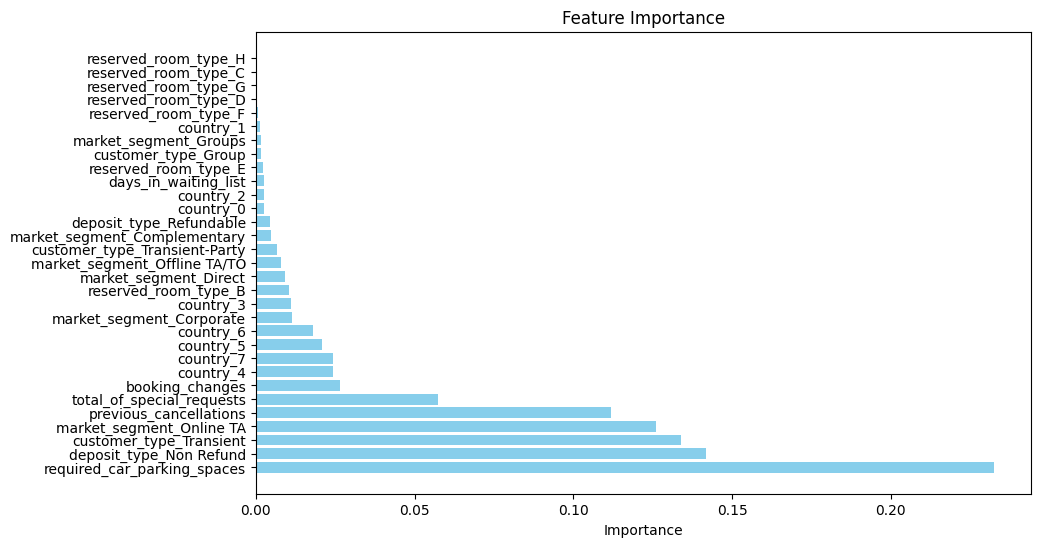

In [49]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Pada grafik di atas, kita dapat menyimpulkan bahwa `required_car_parking_spaces` merupakan fitur yang paling berpengaruh pada pembatalan pesanan, yaitu sebesar 23.2%. Kita juga dapat menyimpulkan bahwa `reserved_room_type` mimiliki pengaruh yang sangat kecil sekali, hanya dibawah 1%. Kolom `country` juga memiliki pengaruh yang cukup kecil yaitu 3%. Oleh karena itu, kita akan mencoba untuk menghapus kedua kolom tersebut untuk mempercepat model dan diharapkan dapat meningkatkan performa model.

In [74]:
# New model with removed features

# Data
df2 = df.copy()
df2 = df2.drop(columns=['country', 'reserved_room_type'])
X2 = df2.drop(columns=['is_canceled'])
y2 = df2['is_canceled']
# Encode
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment', 'deposit_type', 'customer_type'])], remainder='passthrough')
X2_transformed = transformer.fit_transform(X2)
transformed_columns = (list(transformer.transformers_[0][1].get_feature_names_out(['market_segment', 'deposit_type', 'customer_type'])) +
                       list(['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']))
# Encoded & Splitted Data
X2_transformed_df = pd.DataFrame(X2_transformed, columns=transformed_columns)
x2_train,x2_test,y2_train,y2_test=train_test_split(X2_transformed_df,y2,stratify=y2,test_size=0.3,random_state=1234)
# Evaluate model after tuning
models =   {'gbc': GradientBoostingClassifier(),
            'best_gbc_model' : gbc_search.best_estimator_}
results = []
for name, model in models.items():
    model.fit(x2_train, y2_train)
    y2_pred = model.predict(x2_test)
    accuracy = accuracy_score(y2_test, y2_pred)
    precision = precision_score(y2_test, y2_pred, average='weighted')
    f1 = f1_score(y2_test, y2_pred, average='weighted')
    y2_prob = model.predict_proba(x2_test)[:, 1]
    auc = roc_auc_score(y2_test, y2_prob)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1-Score': f1,
        'AUC': auc})

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,F1-Score,AUC
0,gbc,0.803105,0.789822,0.768607,0.832909
1,best_gbc_model,0.803766,0.791362,0.768889,0.833042



Feature Importances:
                          Feature  Importance
14    required_car_parking_spaces    0.256604
6         deposit_type_Non Refund    0.165251
9         customer_type_Transient    0.148365
11         previous_cancellations    0.138103
5        market_segment_Online TA    0.132904
15      total_of_special_requests    0.063954
12                booking_changes    0.029648
1        market_segment_Corporate    0.013071
10  customer_type_Transient-Party    0.009332
13           days_in_waiting_list    0.008688
4    market_segment_Offline TA/TO    0.008654
2           market_segment_Direct    0.007948
7         deposit_type_Refundable    0.005357
0    market_segment_Complementary    0.005285
3           market_segment_Groups    0.004587
8             customer_type_Group    0.002249


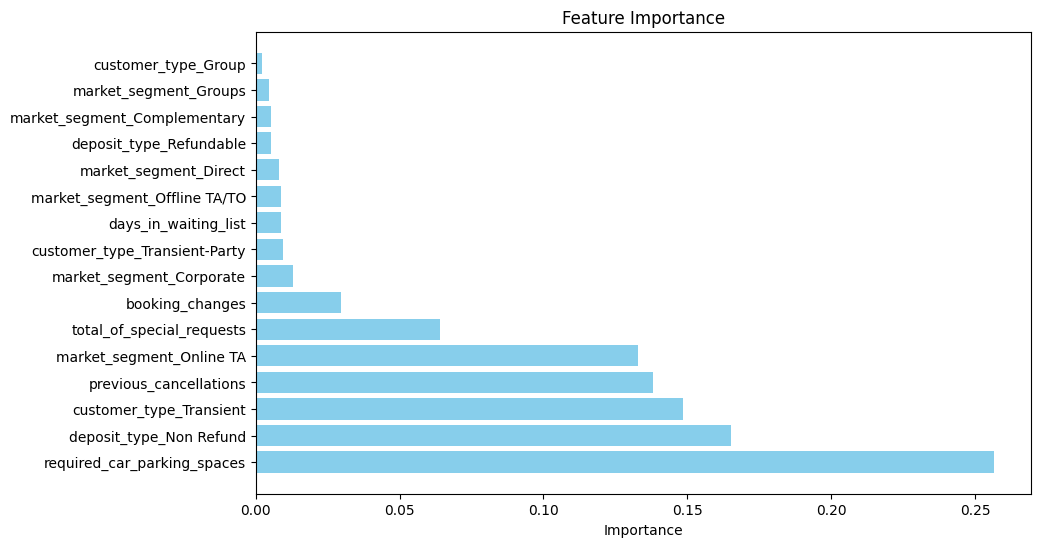

In [70]:
# Feature Importances
best_gbc_model = gbc_search.best_estimator_
feature_importances = best_gbc_model.feature_importances_
feature_names = X2_transformed_df.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Setelah menghapus kolom `country` dan `reserved_room_type`, kita dapat melihat bahwa performa model meningkat. 
| **Model**	| **Accuracy** | **Precision** | **F1-Score** |	**AUC** |
| --- | --- | --- | --- | --- |
| gbc before | 0.798480 | 0.780865 | 0.765155 | 0.845270 |
| best_gbc_model | 0.798480 | 0.784950 | 0.759245 | 0.844253 |
| gbc after | 0.803105 | 0.789822 | 0.768607 | 0.832909 |
| best_gbc_model after | 0.803766 | 0.791362 | 0.768889 | 0.833042 |

Kita juga dapat menyimpulkan bahwa `required_car_parking_spaces` tetap merupakan fitur yang paling berpengaruh pada pembatalan pesanan, dan meningkat menjadi 25.6%. Diikuti oleh `deposit_type`, dengan persentase sebesar 16.5%, lalu `customer_type` - 14.8%, `previous_cancellations` - 13.8% dan `market_segment` - 13.3%.

### **4.4 Save Model**

Pada tahap ini, kita akan menyimpan atau save file dengan pickle.

In [95]:
# Final model
model = gbc_search.best_estimator_

In [96]:
# Save model using pickle
with open('GBC_model.pkl', 'wb') as Angel:
    pickle.dump(model, Angel)
print ('hsjdc')

hsjdc


## **5. Conclusion**

### **5.1 Model Performance**

In [ ]:
# Conclusion
model.fit(x2_train, y2_train)
y2_pred = model.predict(x2_test)

# Confusion matrix
conf_matrix = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report (precision, recall, F1-score)
class_report = classification_report(y2_test, y2_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[2231   76]
 [ 520  200]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2307
           1       0.72      0.28      0.40       720

    accuracy                           0.80      3027
   macro avg       0.77      0.62      0.64      3027
weighted avg       0.79      0.80      0.77      3027



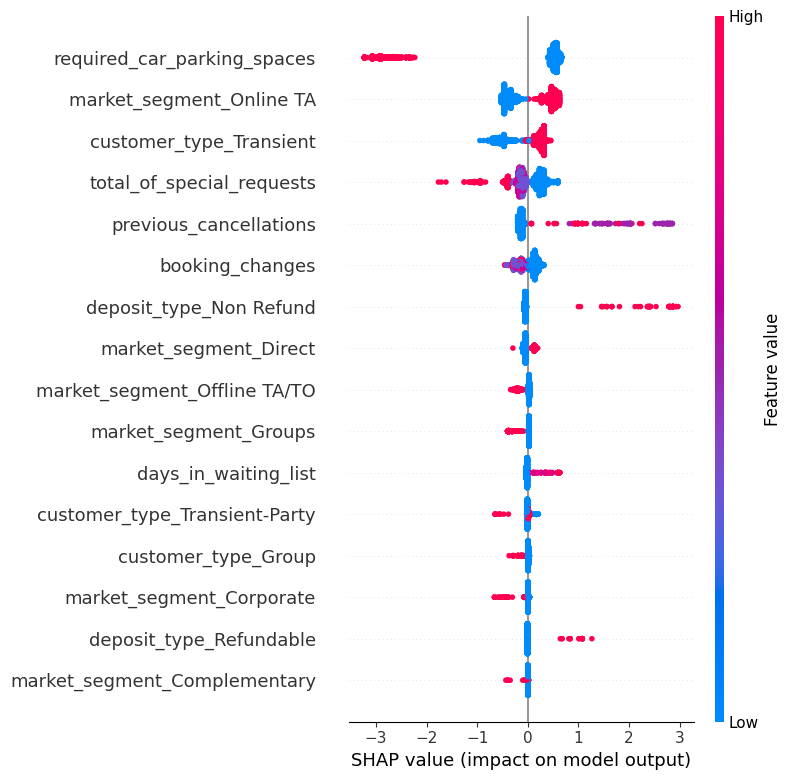

In [ ]:
# SHAP 
explainer = shap.Explainer(best_gbc_model, x2_train)
shap_values = explainer(x2_test)

shap.summary_plot(shap_values, x2_test)


**Confusion Matrix**

Matriks ini memberikan jumlah label kelas aktual versus prediksi untuk membantu menilai performa model klasifikasi.

|  | **Pred_0** | **Pred_1** |
| --- | --- | --- |
| **Actual_0** | 2231 | 76 |
| **Actual_1** | 520 | 200 |

- True Positives (TP): 200 - Model memprediksi kelas 1 (kasus positif) dengan tepat.
- True Negatives (TN): 2231 - Model memprediksi kelas 0 dengan benar (kasus negatif).
- False Positives (FP): 76 - Model salah memprediksi kelas 1 padahal kelas sebenarnya adalah 0.
- False Negatives (FN): 520 - Model salah memprediksi kelas 0 padahal kelas sebenarnya adalah 1.

**Classification Report**

Laporan ini memberikan metrik terperinci, seperti presisi, perolehan, dan skor F1 untuk setiap kelas (kelas 0 dan kelas 1). 

- Precision: <br>
    Precision kelas 0 (Negatif) relatif tinggi (81%), artinya ketika model memprediksi kelas 0, seringkali model tersebut benar. <br>
    Precision kelas 1 (Positif) lebih rendah (73%), artinya saat model memprediksi kelas 1, terdapat sedikit ketidakpastian.<br><br>
- Recall:<br>
    Recall kelas 0 sangat tinggi (97%), artinya model mampu mengidentifikasi instance kelas 0 dengan baik.<br>
    Recall kelas 1 sangat rendah (28%), yang berarti model tersebut kehilangan sejumlah besar instance kelas 1. Hal ini menunjukkan bahwa model tersebut bias terhadap prediksi kelas 0.<br><br>
- F1-score:<br>
    F1-score kelas 0 (0,88) termasuk baik, menunjukkan kinerja yang seimbang dalam mengidentifikasi kelas 0 dengan benar.<br>
    F1-score untuk kelas 1 (0,40) rendah, menunjukkan bahwa model kesulitan mendeteksi kelas 1 secara efektif.<br><br>
- Accuracy: 0,80 <br>
    Secara keseluruhan, model ini 80% benar. Namun, metrik ini dapat menyesatkan jika kumpulan data tidak seimbang (misalnya, jika terdapat lebih banyak instance kelas 0 daripada kelas 1). Dalam hal ini, akurasi model sebagian besar didorong oleh performanya yang baik di kelas 0, namun performanya buruk di kelas 1.<br><br>
- Macro avg:
    - Precision: 0,77 — Ini adalah presisi rata-rata di semua kelas.
    - Recall: 0,62 — Ini adalah rata-rata ingatan di semua kelas.
    - F1-score: 0,64 — Ini adalah rata-rata skor F1 di semua kelas.<br>
    Rata-rata makro memberikan bobot yang sama pada setiap kelas, tanpa memperhatikan ketidakseimbangan kelas.<br><br>
- Weighted avg:
    - Precision: 0,79 — Ini memperhitungkan dukungan (jumlah instance) dari setiap kelas dan rata-rata berdasarkan itu. Ini lebih tinggi dari rata-rata makro karena kelas 0 memiliki jumlah instance yang jauh lebih besar.
    - Recall: 0,80 — Sekali lagi, ini diberi bobot berdasarkan jumlah instance di setiap kelas.
    - F1-score: 0,77 — Skor F1 tertimbang ini mencerminkan kinerja dengan mempertimbangkan ketidakseimbangan kelas.

### **5.2 Conclusion**

Seperti yang telah disampaikan sebelum nya, **Tujuan utama** dari proyek ini adalah untuk membangun model pembelajaran mesin yang dapat memprediksi status pembatalan pemesanan berdasarkan data historis pemesan sebelumnya. Dengan klasifikasi biner, kita akan mendapatkan hasilnya (variabel target) yang berupa: 

- 1: Pemesanan dibatalkan
- 0: Pemesanan tidak dibatalkan

Dengan model yang telah kita buat, kita dapat memprediksi pembatalan sebuah pesanan dan mengoptimalkan inventaris dengan lebih baik.

Pada musim puncak (musim liburan), banyak hotel akan melakukan overbooking dengan sengaja untuk mengimbangi pembatalan atau ketidakdatangan di menit-menit terakhir dan menghindari kehilangan pendapatan [SiteMinder](https://www.siteminder.com/r/hotel-overbookings-pros-and-cons-strategy/).

Seandainya, sebuah hotel memiliki 200 kamar yang functional, namun ada 300 pelanggan yang ingin memesan kamar untuk hari itu dimana harga perkamar kita estimasi 500ribu (range harga kamar hotel di portugal dari [googe](https://www.google.com/travel/search?q=portugal%20hotel%20room%20price&g2lb=4965990%2C4969803%2C72277293%2C72302247%2C72317059%2C72406588%2C72414906%2C72421566%2C72471280%2C72472051%2C72481459%2C72485658%2C72499705%2C72614662%2C72616120%2C72619927%2C72647020%2C72648289%2C72658035%2C72686036%2C72760082%2C72808078&hl=en-ID&gl=id&cs=1&ssta=1&ts=CAESCAoCCAMKAggDGhwSGhIUCgcI6A8QDBgJEgcI6A8QDBgKGAEyAhAAKgcKBToDSURS&qs=CAE4BkIJEc5Y_t-dp2GQQgkRvRpB2zW8IxdCCRHJWBTUGcSMd1pSMlCqAU0QASoJIgVob3RlbCgAMh8QASIb8C5hziS5cqfFvCRDUMhUySRGq5VwA6XzT1WLMh0QAiIZcG9ydHVnYWwgaG90ZWwgcm9vbSBwcmljZQ&ap=KigKEgnyz4DVPxU7QBEwAioc4ZE_wBISCfMafLZ-ukhAEYIRUOEINQvAaAE&ictx=111&ved=0CAAQ5JsGahcKEwigvqzh4pWKAxUAAAAAHQAAAAAQDg) adalah 300rb - 2jtan). Namun ternyata pada hari tersebut, 25 orang membatalkan pesanan atau no show.

Tanpa model ada 2 kemungkinan yang bisa terjadi:
- 1. Menerima 200 bookingan saja
    - Maka revenue yang dapat diterima adalah 175 x 500rb saja karena 10 orang membatalkan pesanan. 
    - Revenue => 87.500.000
- 2. Menerima semua bookingan
    - Maka akan mendapatkan revenue 200 X 500rb.
    - Namun perlu dingat bahwa ada 75 overbooking yang dapat menjadi masalah, kita mungkin harus memberi konpensasi ataupun menempatkannya di hotel lain dengan kualitas (bintang) yang sama. Dimana membutuhkan biaya yang kita estimasi 100rb. 75 x 200rb = 15.000.000
    - Revenue = 100.000.000 - 15.000.000 => 85.000.000

Dengan model, kita dapat memprediksi apakah seorang customer akan membatalkan pesanan atau tidak.
- 200 bookingan akan dimasukan kedalam model untuk memprediksi pembatalan atau tidak. Misalkan hasil pediksi adalah 100 tidak akan membatalkan (0) dan 100 akan membatalkan (1)
- Dari 100 yang diprediksikan tidak akan membatalkan, menurut nilai recall (0) 97% adalah benar, berarti 3 orang kemungkinan akan membatalkan pesanan.
- Dari 100 yang diprediksikan akan membatalkan, menurut nilai recall (1) 28% saja yang benar, berarti 28 orang kemungkinan akan membatalkan pesanan.
- Dengan prediksi ini, kita dapat menerima 31 bookingan lagi.
- Maka revenue yang dapat diterima adalah 200 x 500rb.
- Kompensasi overbooking 6 orang (200 + 31 - 25) adalah 6 x 200rb = 1.200.000
- Revenue = 100.000.000 - 1.200.000 = 98.800.000

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model ini, maka hotel bisa memiliki pendapatan lebih tinggi, mengoptimalkan inventarisnya dan meminimaliskan overbooking.

Selain itu, kita juga dapat **Identifikasi Prediktor Utama Pembatalan**, dengan data yang kita dapatkan tentang fitur, kita mengetahui bahwa `required_car_parking_spaces` merupakan fitur yang paling berpengaruh pada pembatalan pesanan, yaitu sebesar 25.6%. Diikuti oleh `deposit_type`, dengan persentase sebesar 16.5%, lalu `customer_type` - 14.8%, `previous_cancellations` - 13.8% dan `market_segment` - 13.3%.

### **5.3 Model Limitation**

Limitasi:
- Direkomendasi digunakan untuk hotel yang ada di Portugal, karena data berasal dari hotel di portugal.
- Karena kumpulan data memiliki jumlah pemesanan yang tidak dibatalkan secara signifikan lebih tinggi dibandingkan dengan pemesanan yang dibatalkan, model bias dalam memprediksi tidak adanya pembatalan. Hal ini dapat menyebabkan performa buruk, terutama dalam mendeteksi pembatalan, karena model sering kali memprediksi "tidak ada pembatalan".
- Banyaknya data duplikat dan data tidak lengkap dapat mengurangi performa model dengan mengurangi jumlah informasi yang tersedia untuk pelatihan.
- Pembatalan hotel mungkin dipengaruhi oleh faktor eksternal (misalnya cuaca, hari libur, harga pesaing, peristiwa global seperti pandemi) yang tidak tercakup dalam kumpulan data. Jika faktor-faktor eksternal ini tidak disertakan dalam model, maka sinyal-sinyal penting yang memengaruhi perilaku pelanggan dapat hilang dan menyebabkan prediksi yang tidak akurat.
- Pembatalan dapat bervariasi berdasarkan musim (peak season / off season). Jika data yang dikumpulkan adalah data pada off season, kita tidak dapat mengunakan model pada saat peak season dan hasil prediksi tidak akan akurat.
- Perilaku pelanggan (misalnya tren pemesanan, pola pembatalan) dapat berubah seiring waktu karena berbagai faktor seperti kondisi ekonomi, preferensi pelanggan, dan peristiwa global yang tidak terduga (seperti COVID-19). Model yang dilatih berdasarkan data historis mungkin tidak menangkap perubahan ini, sehingga menyebabkan penurunan performa jika perilaku pelanggan berubah secara signifikan.

## **6. Recommendation**

Rekomendasi : 
- Mencoba teknik oversampling pada kelas minoritas (pembatalan), melakukan undersampling pada kelas mayoritas (non-pembatalan), atau mencoba menggunakan algoritme lain yang menangani kelas yang tidak seimbang (misalnya, hutan acak dengan bobot kelas).
- Membuat kebijakan baru agar semua data dapat dikumpulkan lebih lengkap dan rinci karena mayoritas ketidak lengkapan data disebabkan oleh pelanggan tidak memberikan rincian tertentu saat pemesanan, atau informasi yang dimasukkan salah. Contoh kebijakan yang dapat diterapkan dapat berupa pemberian voucher diskon hotel bagi pelanggan yang memberikan informasi lengkap saat pemesanan.
- Cobalah untuk memasukkan data kontekstual tambahan (misalnya peristiwa lokal, kondisi cuaca) jika memungkinkan, atau buat model terpisah untuk menangani faktor eksternal.
- Membuat dan mengunakan 2 model yang berbeda tergantung waktu.
- Lakukan maintainance model secara teratur dengan data baru, dan sertakan feeback untuk beradaptasi dengan tren dan perilaku baru.